<a href="https://colab.research.google.com/github/bitnurihan/Machine-Learning/blob/master/tensorflow_reach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
import numpy as np
print(tf.__version__)

1.15.0


In [0]:
def build_model(train):
  model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[len(train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse'])
  return model

In [0]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [0]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')

  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')

  plt.legend()
  plt.show()


In [0]:
df = pd.read_csv('MLraw_data_group_period_separate.csv')
df['target'] = df['target'].astype('category')
df['channel'] = df['channel'].astype('category')
df['cost_log'] = np.log(df['cost']+1)
df['grp_log'] = np.log(df['grp']+1)
df = df.drop(columns='grp')
# sns.kdeplot(df['cost'])
X = pd.get_dummies(df, prefix_sep='_')

train, test = train_test_split(X, test_size=0.2)

train_labels = train.pop('reach_per')
test_labels = test.pop('reach_per')

cost_labels = train.pop('cost')
cost_test_labels = test.pop('cost')
train.columns

Index(['month', 'cost_log', 'grp_log', 'channel_CJE&M', 'channel_KBSN',
       'channel_MBCPLUS', 'channel_SBS미디어넷', 'channel_etc', 'channel_종합편성채널',
       'channel_지상파3개채널', 'target_769', 'target_1019', 'target_2029',
       'target_3039', 'target_4049', 'target_5059', 'target_6069'],
      dtype='object')

In [0]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(train)
X_test_scaled = scaler.transform(test)
X_train_scaled

array([[ 0.        ,  0.08864743, -0.29176363, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        ,  1.44187904,  1.18679751, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        ,  0.93011189,  0.87852626, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.03732039,  0.12798143, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.99913622, -0.7416089 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.82137388,  0.68914866, ...,  0.        ,
         0.        ,  1.        ]])

,month,cost,grp,channel_CJE&M,channel_KBSN,channel_MBCPLUS,channel_SBS미디어넷,channel_etc,channel_종합편성채널,channel_지상파3개채널,target_769,target_1019,target_2029,target_3039,target_4049,target_5059,target_6069
0,1.0,-0.831247,-0.693546,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.556222,0.691543,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,-3.004933,-1.654746,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.153536,0.071987,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,-0.948832,-1.117769,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64596,0.0,-0.449883,-0.339120,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
64597,0.0,-1.307581,-1.224693,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
64598,0.0,-1.005768,-0.642789,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
64599,0.0,-0.029568,0.105597,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


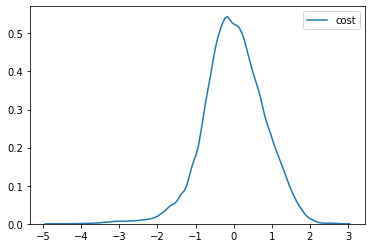

In [0]:
reach_train = pd.DataFrame(X_train_scaled, columns=['month', 'cost', 'grp', 'channel_CJE&M', 'channel_KBSN',
       'channel_MBCPLUS', 'channel_SBS미디어넷', 'channel_etc', 'channel_종합편성채널',
       'channel_지상파3개채널', 'target_769', 'target_1019', 'target_2029',
       'target_3039', 'target_4049', 'target_5059', 'target_6069'])
reach_test = pd.DataFrame(X_test_scaled, columns=['month', 'cost', 'grp', 'channel_CJE&M', 'channel_KBSN',
       'channel_MBCPLUS', 'channel_SBS미디어넷', 'channel_etc', 'channel_종합편성채널',
       'channel_지상파3개채널', 'target_769', 'target_1019', 'target_2029',
       'target_3039', 'target_4049', 'target_5059', 'target_6069'])
# sns.kdeplot(reach_train['grp'])
sns.kdeplot(reach_train['cost'])
reach_test

In [0]:
model = build_model(reach_train)
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               2304      
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 65        
Total params: 10,625
Trainable params: 10,625
Non-trainable params: 0
_________________________________________________________________


In [0]:
example_batch = reach_train[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.09918516],
       [-0.10962988],
       [-0.24016389],
       [-0.21700713],
       [ 0.05935293],
       [ 0.03977178],
       [-0.0875279 ],
       [-0.12985413],
       [-0.26246542],
       [-0.12199815]], dtype=float32)

In [0]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
EPOCHS = 100
history = model.fit(reach_train, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])
model.save('reach_model.h5')


....................................

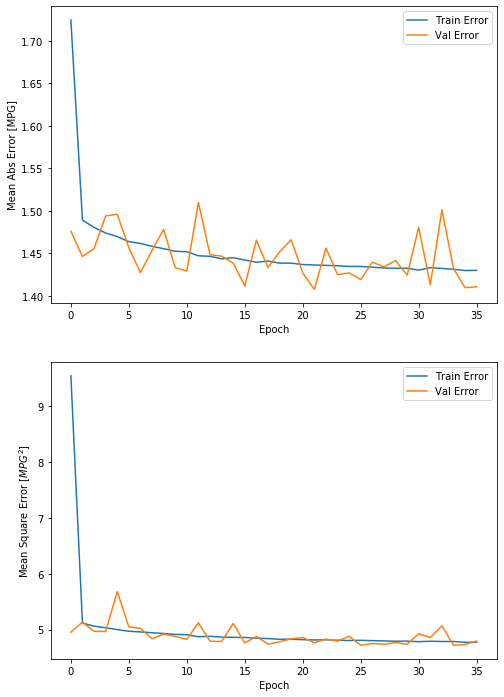

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()
plot_history(history)

In [0]:
loss, mae, mse = model.evaluate(reach_test, test_labels, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} MPG".format(mae))

64601/64601 - 2s - loss: 4.8589 - mean_absolute_error: 1.4217 - mean_squared_error: 4.8589
테스트 세트의 평균 절대 오차:  1.42 MPG


Text(0, 0.5, 'reach')

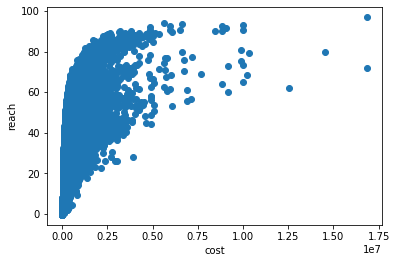

In [0]:
test_predictions = model.predict(reach_test).flatten()

plt.scatter(cost_test_labels, test_predictions)
plt.xlabel('cost')
plt.ylabel('reach')


Text(0, 0.5, 'reach')

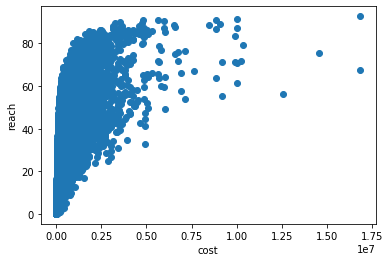

In [0]:
plt.scatter(cost_test_labels, test_labels)
plt.xlabel('cost')
plt.ylabel('reach')


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(0, 10000000000)

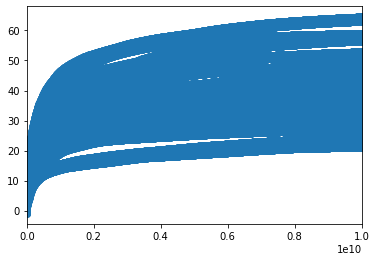

In [0]:
reach_test2 = pd.read_csv('reach_test.csv')
reach_test2 = reach_test2.drop(columns='Unnamed: 0')
reach_test2['target'] = reach_test2['target'].astype('category')
reach_test2['channel'] = reach_test2['channel'].astype('category')
reach = pd.get_dummies(reach_test2, prefix_sep='_')
reach['grp_log'] = np.log(reach['grp']+1)
reach = reach.drop(columns='grp')
cost_label = reach.pop('cost')
reach = reach.fillna(0)
reach
reach = reach [['month', 'cost_log', 'grp_log', 'channel_CJE&M', 'channel_KBSN',
       'channel_MBCPLUS', 'channel_SBS미디어넷', 'channel_etc', 'channel_종합편성채널',
       'channel_지상파3개채널', 'target_769', 'target_1019', 'target_2029',
       'target_3039', 'target_4049', 'target_5059', 'target_6069']]
reach
reach_test_scaled = scaler.transform(reach)
reach_test_scaled
reach_tester = pd.DataFrame(reach_test_scaled, columns=['month', 'cost', 'grp', 'channel_CJE&M', 'channel_KBSN',
       'channel_MBCPLUS', 'channel_SBS미디어넷', 'channel_etc', 'channel_종합편성채널',
       'channel_지상파3개채널', 'target_769', 'target_1019', 'target_2029',
       'target_3039', 'target_4049', 'target_5059', 'target_6069'])
reach_tester
# # sns.kdeplot(cost_label)
# # sns.kdeplot(reach_tester['grp'])
test_reach_predictions = model.predict(reach_tester).flatten()
reach_predict = pd.DataFrame(test_reach_predictions)
reach_result = pd.concat([reach_test2, reach_predict], axis=1)
reach_result = reach_result.rename(columns={0:'reach_per'})
reach_result
reach_result.to_csv('reach_result.csv')
plt.scatter(cost_label, test_reach_predictions)
plt.xlim(0, 10000000000)